# Connection google Drive et Télechargement des données

### 📂 Montage de Google Drive
Connexion du Drive pour accéder aux fichiers de données nécessaires.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 📂 Montage de Google Drive
Connexion du Drive pour accéder aux fichiers de données nécessaires.

In [ ]:
from google.colab import drive
import os

# 1. Monter votre Google Drive
# (Vous devrez autoriser l'accès dans la fenêtre pop-up)
drive.mount('/content/drive')

# 2. Définir et créer le dossier de destination
target_path = "/content/drive/MyDrive/Time_Series_M5"
os.makedirs(target_path, exist_ok=True) # Crée le dossier sans erreur s'il existe déjà

# 3. Télécharger le fichier ZIP directement dans ce dossier
# L'option -P de wget spécifie le dossier de destination
!wget -P {target_path} https://github.com/Nixtla/m5-forecasts/raw/main/datasets/m5.zip

print(f"Téléchargement terminé. Fichier sauvegardé dans : {target_path}/m5.zip")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
--2025-11-10 16:08:28--  https://github.com/Nixtla/m5-forecasts/raw/main/datasets/m5.zip
Resolving github.com (github.com)... 140.82.116.3
Connecting to github.com (github.com)|140.82.116.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Nixtla/m5-forecasts/main/datasets/m5.zip [following]
--2025-11-10 16:08:28--  https://raw.githubusercontent.com/Nixtla/m5-forecasts/main/datasets/m5.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50219189 (48M) [application/zip]
Saving to: ‘/content/drive/MyDrive/Time_Series_M5/m5.zip’

m5.zip              100%[==================

### 📦 Décompression des données M5
Extraction des fichiers nécessaires à partir du dossier compressé.

In [ ]:
# Chemin complet vers le fichier zip
zip_file_path = "/content/drive/MyDrive/Time_Series_M5/m5.zip"

# Dossier où extraire les fichiers (le même dossier)
extract_path = "/content/drive/MyDrive/Time_Series_M5"

# Commande pour décompresser
!unzip {zip_file_path} -d {extract_path}

print("Fichiers décompressés !")

Archive:  /content/drive/MyDrive/Time_Series_M5/m5.zip
  inflating: /content/drive/MyDrive/Time_Series_M5/sales_train_validation.csv  
  inflating: /content/drive/MyDrive/Time_Series_M5/weights_validation.csv  
  inflating: /content/drive/MyDrive/Time_Series_M5/sales_train_evaluation.csv  
  inflating: /content/drive/MyDrive/Time_Series_M5/sales_test_validation.csv  
  inflating: /content/drive/MyDrive/Time_Series_M5/sales_test_evaluation.csv  
  inflating: /content/drive/MyDrive/Time_Series_M5/sell_prices.csv  
  inflating: /content/drive/MyDrive/Time_Series_M5/weights_evaluation.csv  
  inflating: /content/drive/MyDrive/Time_Series_M5/calendar.csv  
Fichiers décompressés !


# Télechargement des packages

### ⚙️ Installation des dépendances
Installation des bibliothèques utiles pour l’analyse et la modélisation.

In [2]:
!pip install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.3/399.3 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 60.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 30.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 4.0 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.3
    Uninstalling scipy-1.16.3:
      Successfully uninstalled scipy-1.16.3


### ⚙️ Installation des dépendances
Installation des bibliothèques utiles pour l’analyse et la modélisation.

In [3]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 41.0 MB/s eta 0:00:00


# Préparation et réduction des données

Dans cette étape, nous chargeons les trois fichiers CSV essentiels. Pour accélérer le prototypage et les tests, nous ne travaillons que sur un petit sous-ensemble de données :

Ventes (df_sales) : Sélection des 10 articles (aléatoires) (N_ITEMS = 10).

Calendrier (df_calendar) : Sélection des 60 premiers jours (N_DAYS = 60) pour correspondre aux colonnes de ventes (d_1 à d_60).

Prix (df_prices) : Nous chargeons ce fichier et le filtrons immédiatement pour ne garder que les prix correspondant à nos 10 articles et aux semaines (wm_yr_wk) de nos 60 jours.

Chargement des données (Ventes, Calendrier, Prix)...
Données chargées avec succès.
Sélection aléatoire de 10 articles...
Filtrage des prix pour 10 articles et 9 semaines.
Prix filtrés. 270 enregistrements de prix conservés.
✅ Données finales prêtes (ventes, dates, prix) :
                        id       date  sales  sell_price
0      FOODS_3_180_CA_1_CA 2011-01-29      0         NaN
1  HOUSEHOLD_2_383_CA_3_CA 2011-01-29      2        3.97
2      FOODS_3_409_CA_3_CA 2011-01-29      0         NaN
3      FOODS_1_097_CA_2_CA 2011-01-29      0         NaN
4    HOBBIES_1_272_TX_2_TX 2011-01-29      0         NaN
✅ Fichier sauvegardé avec succès : /content/drive/MyDrive/Time_Series_M5/df_final_reduced.csv
Génération de la visualisation...


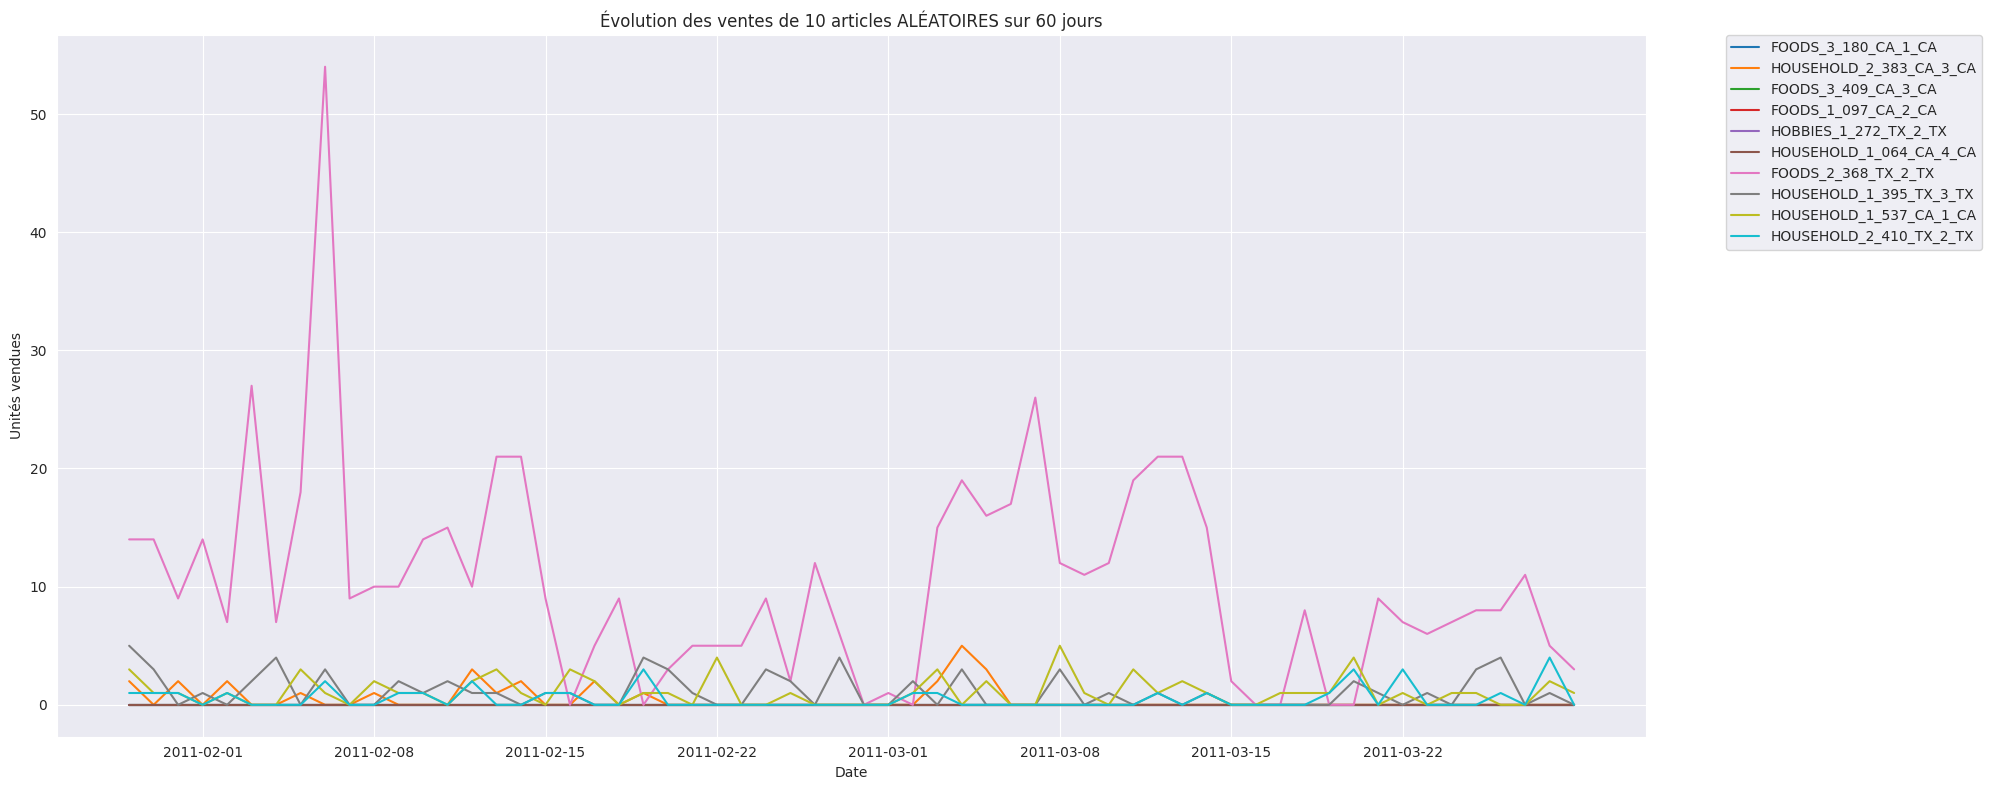

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# --- 1. Définir les chemins ---
BASE_PATH = "/content/drive/MyDrive/Time_Series_M5"
SALES_PATH = os.path.join(BASE_PATH, "sales_train_validation.csv")
CALENDAR_PATH = os.path.join(BASE_PATH, "calendar.csv")
PRICES_PATH = os.path.join(BASE_PATH, "sell_prices.csv")  # Chemin des prix
OUTPUT_CSV = os.path.join(BASE_PATH, "df_final_reduced.csv")  # 🔹 fichier final

# --- 2. Paramètres de réduction ---
N_ITEMS = 10  # Nombre d'articles (lignes)
N_DAYS = 60   # Nombre de jours (colonnes)

print("Chargement des données (Ventes, Calendrier, Prix)...")

# --- 3. Charger les données ---
try:
    df_sales = pd.read_csv(SALES_PATH)
    df_calendar = pd.read_csv(CALENDAR_PATH)
    df_prices = pd.read_csv(PRICES_PATH)
except FileNotFoundError:
    print(f"Erreur: Fichiers non trouvés. Vérifiez que le chemin {BASE_PATH} est correct.")
    raise

print("Données chargées avec succès.")

# --- 4. Préparer ventes réduites ---
df_sales = df_sales.copy()
df_sales['id'] = df_sales['item_id'] + '_' + df_sales['store_id'] + '_' + df_sales['state_id']

day_cols = [f'd_{i}' for i in range(1, N_DAYS + 1)]
id_cols = ['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id']

missing_days = [c for c in day_cols if c not in df_sales.columns]
if missing_days:
    raise KeyError(f"Colonnes manquantes : {missing_days}")

# ▼▼▼ MODIFICATION ICI ▼▼▼
print(f"Sélection aléatoire de {N_ITEMS} articles...")
# Remplacer .head(N_ITEMS) par .sample(n=N_ITEMS)
# random_state=42 assure que vous obtiendrez toujours le MÊME échantillon "aléatoire"
df_sales_small = df_sales[id_cols + day_cols].sample(n=N_ITEMS, random_state=42).copy()
# ▲▲▲ FIN DE LA MODIFICATION ▲▲▲


# --- 5. Préparer le calendrier ---
if 'd' in df_calendar.columns:
    df_calendar_small = df_calendar[['d', 'date', 'wm_yr_wk']].iloc[:N_DAYS].copy()
    df_calendar_small['date'] = pd.to_datetime(df_calendar_small['date'])
else:
    dates = pd.to_datetime(df_calendar['date'].iloc[:N_DAYS].values)
    wm_yr_wk = df_calendar['wm_yr_wk'].iloc[:N_DAYS].values
    df_calendar_small = pd.DataFrame({
        'd': day_cols,
        'date': dates,
        'wm_yr_wk': wm_yr_wk
    })

# --- 6. Réduction des prix ---
weeks_to_keep = df_calendar_small['wm_yr_wk'].unique()
items_to_keep = df_sales_small['item_id'].unique()
stores_to_keep = df_sales_small['store_id'].unique()

print(f"Filtrage des prix pour {len(items_to_keep)} articles et {len(weeks_to_keep)} semaines.")
df_prices_small = df_prices[
    (df_prices['item_id'].isin(items_to_keep)) &
    (df_prices['store_id'].isin(stores_to_keep)) &
    (df_prices['wm_yr_wk'].isin(weeks_to_keep))
].copy()

print(f"Prix filtrés. {len(df_prices_small)} enregistrements de prix conservés.")

# --- 7. Pivoter ventes (wide -> long) ---
df_long = pd.melt(
    df_sales_small,
    id_vars=id_cols,
    value_vars=day_cols,
    var_name='d',
    value_name='sales'
).copy()

# --- 8. Fusion ventes <-> calendrier ---
df_merged_sales_calendar = pd.merge(
    df_long,
    df_calendar_small,
    on='d',
    how='left',
    validate='m:1'
).copy()

# --- 9. Harmoniser types de wm_yr_wk ---
def safe_to_int_series(s):
    try:
        return pd.to_numeric(s, errors='raise').astype(int)
    except Exception:
        return pd.to_numeric(s, errors='coerce').astype('Int64')

if df_merged_sales_calendar['wm_yr_wk'].dtype != df_prices_small['wm_yr_wk'].dtype:
    df_merged_sales_calendar['wm_yr_wk'] = safe_to_int_series(df_merged_sales_calendar['wm_yr_wk'])
    df_prices_small['wm_yr_wk'] = safe_to_int_series(df_prices_small['wm_yr_wk'])

# --- 10. Fusion finale avec les prix ---
df_final = pd.merge(
    df_merged_sales_calendar,
    df_prices_small,
    on=['store_id', 'item_id', 'wm_yr_wk'],
    how='left',
    validate='m:1'
).copy()

print("✅ Données finales prêtes (ventes, dates, prix) :")
print(df_final[['id', 'date', 'sales', 'sell_price']].head())

# --- 🔹 11. Sauvegarde dans le Drive ---
df_final.to_csv(OUTPUT_CSV, index=False)
print(f"✅ Fichier sauvegardé avec succès : {OUTPUT_CSV}")

# --- 12. Visualisation ---
print("Génération de la visualisation...")
plt.figure(figsize=(20, 8))
sns.set_style("darkgrid")

sns.lineplot(data=df_final, x='date', y='sales', hue='id', estimator=None)

# Titre modifié pour refléter la sélection aléatoire
plt.title(f'Évolution des ventes de {N_ITEMS} articles ALÉATOIRES sur {N_DAYS} jours')
plt.xlabel('Date')
plt.ylabel('Unités vendues')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
plt.show()

Fichier /content/drive/MyDrive/Time_Series_M5/df_final_reduced.csv chargé.
Nettoyage des prix manquants (NaN)...
Nettoyage terminé.

--- Inspection avec .info() ---
<class 'pandas.core.frame.DataFrame'>
Index: 600 entries, 3 to 599
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          600 non-null    object        
 1   item_id     600 non-null    object        
 2   dept_id     600 non-null    object        
 3   cat_id      600 non-null    object        
 4   store_id    600 non-null    object        
 5   state_id    600 non-null    object        
 6   d           600 non-null    object        
 7   sales       600 non-null    int64         
 8   date        600 non-null    datetime64[ns]
 9   wm_yr_wk    600 non-null    int64         
 10  sell_price  300 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(7)
memory usage: 56.2+ KB

--- Inspection avec .head() 

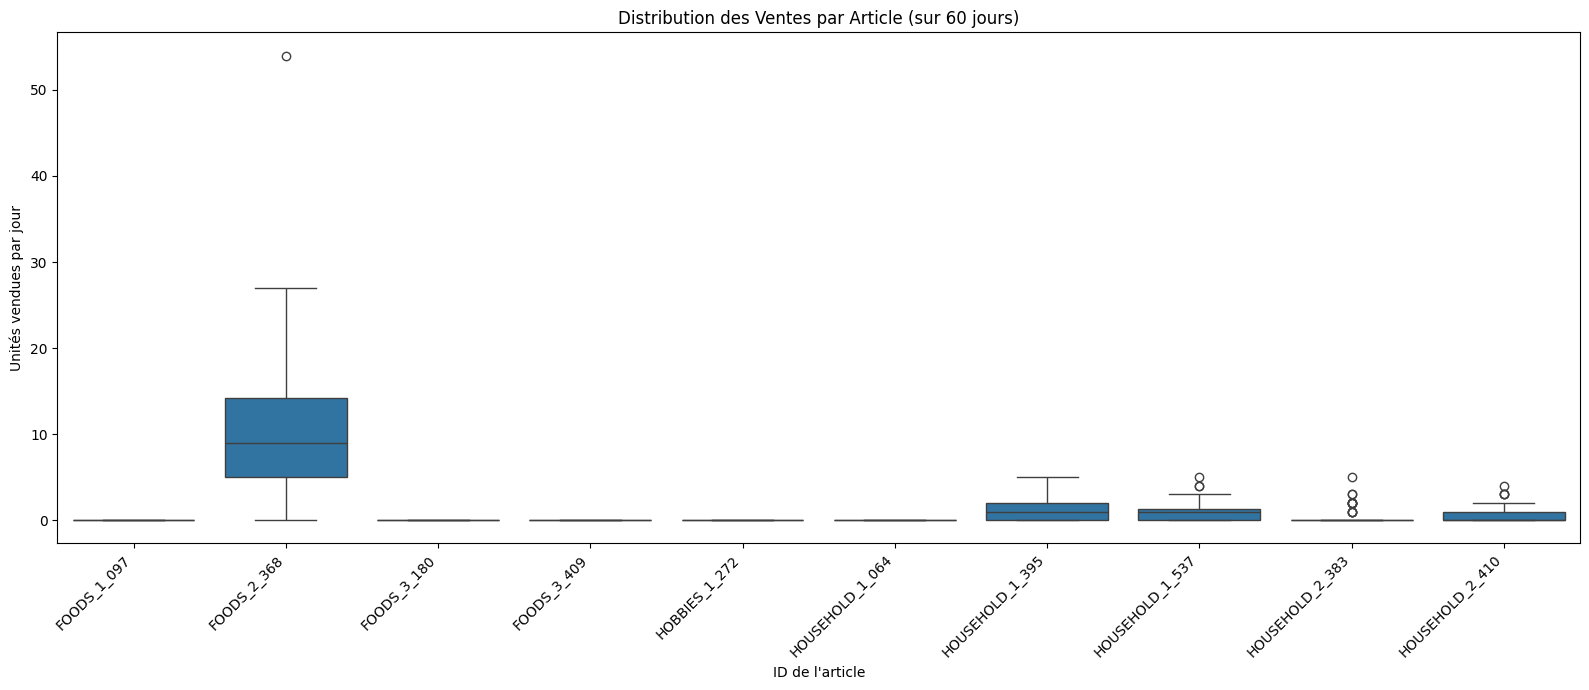

Génération Graphique 2: Scatterplot


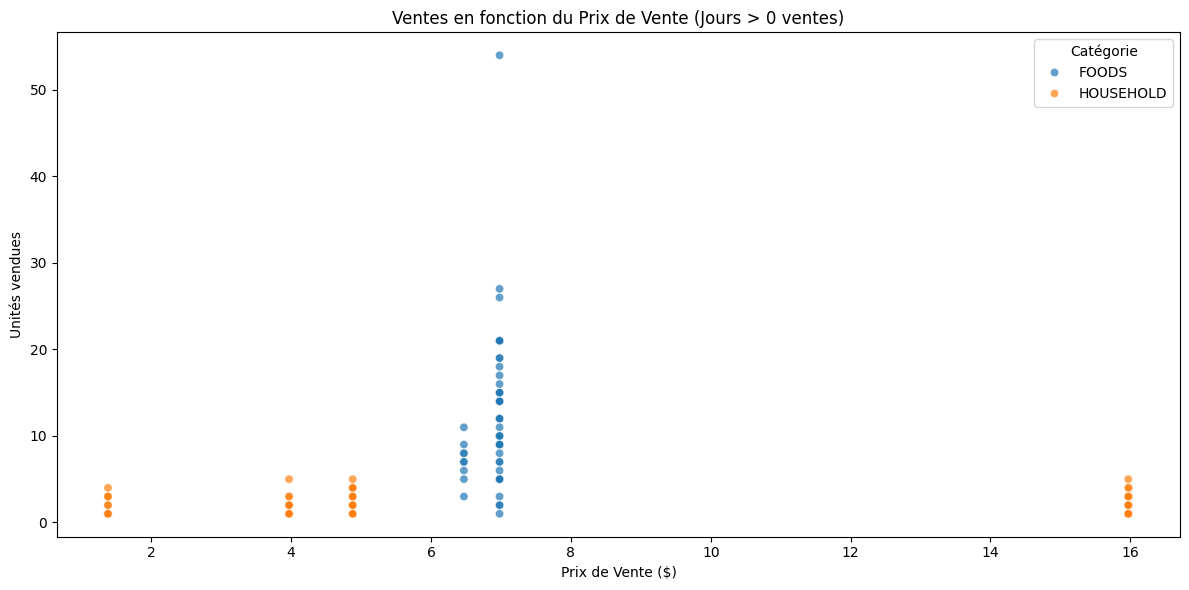


--- Script terminé ---


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# --- 1. Charger les données ---
# S'assure de charger le fichier depuis votre Drive
BASE_PATH = "/content/drive/MyDrive/Time_Series_M5"
file_path = os.path.join(BASE_PATH, "df_final_reduced.csv")

try:
    df_final = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"Erreur: Fichier '{file_path}' non trouvé.")
    print("Veuillez vous assurer qu'il est au bon emplacement dans votre Drive.")
    # Si le fichier n'est pas trouvé, on arrête le script
    raise

print(f"Fichier {file_path} chargé.")

# --- 2. Appliquer le nettoyage des prix (Imputation) ---
print("Nettoyage des prix manquants (NaN)...")

# Convertir la date en datetime pour un tri correct
df_final['date'] = pd.to_datetime(df_final['date'])

# Trier par 'id' et 'date' pour que ffill/bfill fonctionnent correctement
df_final = df_final.sort_values(by=['id', 'date'])

# 'ffill' (forward fill): Remplit avec la dernière valeur connue pour cet article
df_final['sell_price'] = df_final.groupby('id')['sell_price'].ffill()

# 'bfill' (backward fill): Remplit les NaN du début avec la première valeur future
df_final['sell_price'] = df_final.groupby('id')['sell_price'].bfill()

print("Nettoyage terminé.")

# --- 3. Inspection avec .info() et .head() ---

print("\n--- Inspection avec .info() ---")
df_final.info()

print("\n--- Inspection avec .head() (prix maintenant remplis) ---")
print(df_final[['id', 'date', 'sales', 'sell_price']].head())

# Vérifier s'il reste des NaN
nan_count = df_final['sell_price'].isna().sum()
if nan_count > 0:
    print(f"\nATTENTION: Il reste {nan_count} prix manquants (articles sans info de prix).")
else:
    print("\nConfirmation : Tous les prix manquants ont été complétés.")


# --- 4. Visualisation 1: Distribution des ventes (Boxplot) ---

print("\nGénération Graphique 1: Boxplot")
plt.figure(figsize=(16, 7))
sns.boxplot(data=df_final, x='item_id', y='sales')
plt.title('Distribution des Ventes par Article (sur 60 jours)')
plt.xlabel('ID de l\'article')
plt.ylabel('Unités vendues par jour')
plt.xticks(rotation=45, ha='right') # Rotation pour lisibilité
plt.tight_layout()
plt.show()  # Utiliser plt.show() pour afficher dans le notebook


# --- 5. Visualisation 2: Corrélation Prix vs Ventes (Scatter plot) ---

print("Génération Graphique 2: Scatterplot")

# Filtrer pour un graphique plus lisible
df_with_sales = df_final[df_final['sales'] > 0]

plt.figure(figsize=(12, 6))

if not df_with_sales.empty:
    sns.scatterplot(data=df_with_sales, x='sell_price', y='sales', hue='cat_id', alpha=0.7)
    plt.title('Ventes en fonction du Prix de Vente (Jours > 0 ventes)')
    plt.xlabel('Prix de Vente ($)')
    plt.ylabel('Unités vendues')
    plt.legend(title='Catégorie')
else:
    print("Aucune vente (quantité > 0) trouvée dans cet échantillon pour le scatterplot.")
    plt.text(0.5, 0.5, 'Aucune vente (quantité > 0) trouvée dans cet échantillon.',
             horizontalalignment='center', verticalalignment='center')
    plt.title('Ventes en fonction du Prix de Vente')

plt.tight_layout()
plt.show()  # Utiliser plt.show() pour afficher dans le notebook

print("\n--- Script terminé ---")

# Préparation des données pour l'entrainement.

In [5]:
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# --- Introduction ---
# Ce script prépare le DataFrame nettoyé pour l'entraînement d'un modèle
# (LSTM, GRU, RNN). Il s'occupe de l'encodage, de la normalisation
# et de la création de séquences (windowing).

# --- 0. Charger et Nettoyer les Données (Rappel) ---

print("Chargement et nettoyage final des données...")
BASE_PATH = "/content/drive/MyDrive/Time_Series_M5"
file_path = os.path.join(BASE_PATH, "df_final_reduced.csv")

try:
    df_final = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"Erreur: Fichier '{file_path}' non trouvé.")
    raise

# Convertir la date et trier
df_final['date'] = pd.to_datetime(df_final['date'])
df_final = df_final.sort_values(by=['id', 'date'])

# Imputation (ffill/bfill)
df_final['sell_price'] = df_final.groupby('id')['sell_price'].ffill()
df_final['sell_price'] = df_final.groupby('id')['sell_price'].bfill()

# [ÉTAPE CRUCIALE] Gérer les articles sans aucun prix
# S'il reste des NaN (articles sans info de prix sur 60j), on les met à 0.
# Un modèle ne peut pas gérer les NaN.
df_final['sell_price'] = df_final['sell_price'].fillna(0)

print("Nettoyage final terminé. Aucun NaN restant dans 'sell_price'.")


# --- 1. Feature Engineering ---

print("\nPhase 1: Feature Engineering...")
df_features = df_final.copy()

# 1a. Extraire les features de la date
# Les RNN ne comprennent pas les dates, mais comprennent les cycles (jour, mois)
df_features['day_of_week'] = df_features['date'].dt.dayofweek
df_features['day_of_month'] = df_features['date'].dt.day
df_features['month'] = df_features['date'].dt.month

# 1b. Encoder les variables catégorielles
# Nous transformons les 'id' (textes) en entiers (0, 1, 2...).
# C'est nécessaire pour les "Embedding Layers" du futur modèle.
cat_cols = ['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id']
encoders = {} # Pour stocker les encodeurs

for col in cat_cols:
    le = LabelEncoder()
    df_features[col] = le.fit_transform(df_features[col])
    encoders[col] = le # On garde l'encodeur si besoin

print("Features de date et encodage catégoriel terminés.")
# Note: 'id' est maintenant un entier de 0 à 9 (pour nos 10 articles)


# --- 2. Normalisation (Scaling) ---

print("\nPhase 2: Normalisation (Scaling)...")
df_scaled = df_features.copy()

# Dictionnaire pour stocker les scalers (TRÈS IMPORTANT pour
# inverser la prédiction plus tard et retrouver les vraies ventes)
scalers = {}

# 2a. Scaler global (pour prix et dates)
# Ces features ont une échelle absolue (ex: 'month' est 1-12 pour tout le monde)
global_scale_cols = ['sell_price', 'day_of_week', 'day_of_month', 'month']
global_scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled[global_scale_cols] = global_scaler.fit_transform(df_scaled[global_scale_cols])
scalers['global'] = global_scaler

# 2b. Scalers par groupe (pour 'sales')
# 'sales' doit être scalé par article. 10 ventes pour l'article A
# n'est pas la même chose que 10 ventes pour l'article B.
scalers['sales'] = {}
for item_id_int in df_scaled['id'].unique(): # Boucle 0 à 9
    scaler_sales = MinMaxScaler(feature_range=(0, 1))
    item_mask = (df_scaled['id'] == item_id_int)

    # .fit_transform attend un DataFrame (avec [[...]])
    sales_data = df_scaled.loc[item_mask, ['sales']]
    df_scaled.loc[item_mask, ['sales']] = scaler_sales.fit_transform(sales_data)

    scalers['sales'][item_id_int] = scaler_sales

print("Normalisation (0 à 1) terminée.")
print(df_scaled[['id', 'date', 'sales', 'sell_price']].head())


# --- 3. Création des Séquences (Windowing) ---

print("\nPhase 3: Création des Séquences (Windowing)...")

# Paramètres :
# Combien de jours passés (N_PAST) pour prédire combien de jours futurs (N_FUTURE)
N_PAST = 14     # On utilise les 14 derniers jours...
N_FUTURE = 1    # ...pour prédire le jour suivant.
                # (Vous pouvez changer N_PAST, ex: 7, 21, 30)

X_sequences = [] # Stocke les features (passé)
y_sequences = [] # Stocke la cible (futur)

# Colonnes qui seront nos 'features' pour le modèle
cat_feature_cols = ['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id']
num_feature_cols = ['sales', 'sell_price', 'day_of_week', 'day_of_month', 'month']
feature_cols = cat_feature_cols + num_feature_cols

target_col = 'sales' # Ce que nous voulons prédire

# Boucler sur chaque article (id de 0 à 9)
for item_id_int in df_scaled['id'].unique():

    # Extraire l'historique complet (60 jours) de cet article
    item_history = df_scaled[df_scaled['id'] == item_id_int]

    # 'Glisser' la fenêtre sur ces 60 jours
    # (de l'indice N_PAST jusqu'à la fin)
    for i in range(N_PAST, len(item_history) - N_FUTURE + 1):

        # Séquence de 'X' (features passées)
        # ex: jours 0 à 13 (N_PAST=14)
        past_data = item_history.iloc[i - N_PAST : i][feature_cols]
        X_sequences.append(past_data.values)

        # Séquence de 'y' (target future)
        # ex: jour 14 (N_FUTURE=1)
        future_data = item_history.iloc[i : i + N_FUTURE][target_col]
        y_sequences.append(future_data.values)

# Convertir les listes en arrays NumPy 3D/2D
X = np.array(X_sequences)
y = np.array(y_sequences)

# Aplatir 'y' si N_FUTURE=1
if N_FUTURE == 1:
    y = y.ravel()

print("\n--- Données prêtes pour le modèle ---")
print(f"Shape de X (échantillons, jours passés, features): {X.shape}")
print(f"Shape de y (échantillons,): {y.shape}")

# (échantillons = 10 articles * (60 jours - 14 passés - 1 futur + 1) = 10 * 46 = 460)


# --- 4. Séparation Train/Test ---

print("\nPhase 4: Séparation Train/Test...")
# IMPORTANT: Pour les séries temporelles, on ne mélange JAMAIS (shuffle=False).
# On entraîne sur le passé (ex: 80% des séquences) et on teste sur le futur (20%).

test_size_pct = 0.2
test_split_idx = int(X.shape[0] * (1 - test_size_pct))

X_train = X[:test_split_idx]
y_train = y[:test_split_idx]
X_test = X[test_split_idx:]
y_test = y[test_split_idx:]

print("Split terminé (sans 'shuffle').")
print(f"Shape X_train: {X_train.shape} | Shape y_train: {y_train.shape}")
print(f"Shape X_test: {X_test.shape}   | Shape y_test: {y_test.shape}")

print("\n\n✅  Préparation terminée. Vous pouvez maintenant entraîner un modèle avec (X_train, y_train).")

Chargement et nettoyage final des données...
Nettoyage final terminé. Aucun NaN restant dans 'sell_price'.

Phase 1: Feature Engineering...
Features de date et encodage catégoriel terminés.

Phase 2: Normalisation (Scaling)...
Normalisation (0 à 1) terminée.
    id       date  sales  sell_price
3    0 2011-01-29    0.0         0.0
13   0 2011-01-30    0.0         0.0
23   0 2011-01-31    0.0         0.0
33   0 2011-02-01    0.0         0.0
43   0 2011-02-02    0.0         0.0

Phase 3: Création des Séquences (Windowing)...


/tmp/ipython-input-3229082434.py:91: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.25925926 0.25925926 0.16666667 0.25925926 0.12962963 0.5
 0.12962963 0.33333333 1.         0.16666667 0.18518519 0.18518519
 0.25925926 0.27777778 0.18518519 0.38888889 0.38888889 0.16666667
 0.         0.09259259 0.16666667 0.         0.05555556 0.09259259
 0.09259259 0.09259259 0.16666667 0.03703704 0.22222222 0.11111111
 0.         0.01851852 0.         0.27777778 0.35185185 0.2962963
 0.31481481 0.48148148 0.22222222 0.2037037  0.22222222 0.35185185
 0.38888889 0.38888889 0.27777778 0.03703704 0.         0.
 0.14814815 0.         0.         0.16666667 0.12962963 0.11111111
 0.12962963 0.14814815 0.14814815 0.2037037  0.09259259 0.05555556]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_scaled.loc[item_mask, ['sales']] = scaler_sales.fit_transform(sales_data)



--- Données prêtes pour le modèle ---
Shape de X (échantillons, jours passés, features): (460, 14, 11)
Shape de y (échantillons,): (460,)

Phase 4: Séparation Train/Test...
Split terminé (sans 'shuffle').
Shape X_train: (368, 14, 11) | Shape y_train: (368,)
Shape X_test: (92, 14, 11)   | Shape y_test: (92,)


✅  Préparation terminée. Vous pouvez maintenant entraîner un modèle avec (X_train, y_train).


In [6]:
"""
preprocessing.py
- Chargement de df_final_reduced.csv
- Encoding, scaling (global + sales per id)
- Windowing (N_PAST, N_FUTURE)
- Split chronologique train/val/test
- Sauvegarde: data_windowed.npz + scalers_and_encoders.pkl
"""

import os
import pickle
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# -----------------------
# USER CONFIG
# -----------------------
BASE_PATH = "/content/drive/MyDrive/Time_Series_M5"   # <-- adapte si besoin
FILE_NAME = "df_final_reduced.csv"
FILE_PATH = os.path.join(BASE_PATH, FILE_NAME)

OUTPUT_DIR = BASE_PATH  # où sauvegarder les npz/pkl
N_PAST = 14
N_FUTURE = 1   # change to 7 pour multi-step (utiliser train_multi_step ensuite)
TEST_PCT = 0.15
VAL_PCT = 0.15
RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)

# -----------------------
# Charger et nettoyer
# -----------------------
if not os.path.exists(FILE_PATH):
    raise FileNotFoundError(f"File not found: {FILE_PATH}")

df = pd.read_csv(FILE_PATH)
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(['id', 'date']).reset_index(drop=True)

# fill price
df['sell_price'] = df.groupby('id')['sell_price'].ffill()
df['sell_price'] = df.groupby('id')['sell_price'].bfill()
df['sell_price'] = df['sell_price'].fillna(0)

# -----------------------
# Feature engineering
# -----------------------
df['day_of_week'] = df['date'].dt.dayofweek
df['day_of_month'] = df['date'].dt.day
df['month'] = df['date'].dt.month

cat_cols = ['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id']
encoders = {}
for c in cat_cols:
    le = LabelEncoder()
    df[c] = le.fit_transform(df[c].astype(str))
    encoders[c] = le

# -----------------------
# Scaling
# global scaler for price & date-related features
# per-id scaler for sales
# -----------------------
global_cols = ['sell_price', 'day_of_week', 'day_of_month', 'month']
global_scaler = MinMaxScaler()
df[global_cols] = global_scaler.fit_transform(df[global_cols])

sales_scalers = {}
for item_int in sorted(df['id'].unique()):
    mask = df['id'] == item_int
    scaler = MinMaxScaler()
    sales_vals = df.loc[mask, ['sales']].values
    if len(sales_vals) == 0:
        continue
    df.loc[mask, ['sales']] = scaler.fit_transform(sales_vals)
    sales_scalers[item_int] = scaler

# -----------------------
# Windowing
# -----------------------
feature_cat = ['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id']
feature_num = ['sales', 'sell_price', 'day_of_week', 'day_of_month', 'month']
feature_cols = feature_cat + feature_num
target_col = 'sales'

X_list = []
y_list = []
for item_int in sorted(df['id'].unique()):
    df_item = df[df['id'] == item_int].sort_values('date')
    n = df_item.shape[0]
    if n < N_PAST + N_FUTURE:
        continue
    values = df_item[feature_cols].values
    sales_vals = df_item[target_col].values
    for i in range(N_PAST, n - N_FUTURE + 1):
        X_seq = values[i - N_PAST : i, :]
        y_seq = sales_vals[i : i + N_FUTURE]
        X_list.append(X_seq)
        y_list.append(y_seq)

X = np.array(X_list)  # (samples, N_PAST, n_features)
y = np.array(y_list)  # (samples, N_FUTURE)

# ensure y is 2D (samples, H)
if y.ndim == 1:
    y = y.reshape(-1, 1)

print(f"[preprocessing] X shape: {X.shape}, y shape: {y.shape}")

# -----------------------
# Chronological split train/val/test (no shuffle)
# -----------------------
n = X.shape[0]
test_size = int(np.ceil(n * TEST_PCT))
val_size = int(np.ceil(n * VAL_PCT))
train_size = n - val_size - test_size
if train_size <= 0:
    raise ValueError("Not enough samples. Adjust TEST_PCT/VAL_PCT or increase data.")

X_train = X[:train_size]
y_train = y[:train_size]
X_val = X[train_size:train_size + val_size]
y_val = y[train_size:train_size + val_size]
X_test = X[train_size + val_size:]
y_test = y[train_size + val_size:]

print(f"[preprocessing] splits -> train: {X_train.shape[0]}, val: {X_val.shape[0]}, test: {X_test.shape[0]}")

# -----------------------
# Save artifacts
# -----------------------
npz_path = os.path.join(OUTPUT_DIR, "data_windowed.npz")
np.savez_compressed(npz_path,
                    X=X, y=y,
                    X_train=X_train, y_train=y_train,
                    X_val=X_val, y_val=y_val,
                    X_test=X_test, y_test=y_test)
print(f"[preprocessing] Saved data npz to: {npz_path}")

pkl_path = os.path.join(OUTPUT_DIR, "scalers_and_encoders.pkl")
with open(pkl_path, "wb") as f:
    pickle.dump({
        "global_scaler": global_scaler,
        "sales_scalers": sales_scalers,
        "encoders": encoders,
        "feature_cols": feature_cols,
        "N_PAST": N_PAST,
        "N_FUTURE": N_FUTURE
    }, f)
print(f"[preprocessing] Saved scalers/encoders to: {pkl_path}")

print("[preprocessing] Done.")


/tmp/ipython-input-4073608147.py:77: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.25925926 0.25925926 0.16666667 0.25925926 0.12962963 0.5
 0.12962963 0.33333333 1.         0.16666667 0.18518519 0.18518519
 0.25925926 0.27777778 0.18518519 0.38888889 0.38888889 0.16666667
 0.         0.09259259 0.16666667 0.         0.05555556 0.09259259
 0.09259259 0.09259259 0.16666667 0.03703704 0.22222222 0.11111111
 0.         0.01851852 0.         0.27777778 0.35185185 0.2962963
 0.31481481 0.48148148 0.22222222 0.2037037  0.22222222 0.35185185
 0.38888889 0.38888889 0.27777778 0.03703704 0.         0.
 0.14814815 0.         0.         0.16666667 0.12962963 0.11111111
 0.12962963 0.14814815 0.14814815 0.2037037  0.09259259 0.05555556]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[mask, ['sales']] = scaler.fit_transform(sales_vals)


[preprocessing] X shape: (460, 14, 11), y shape: (460, 1)
[preprocessing] splits -> train: 322, val: 69, test: 69
[preprocessing] Saved data npz to: /content/drive/MyDrive/Time_Series_M5/data_windowed.npz
[preprocessing] Saved scalers/encoders to: /content/drive/MyDrive/Time_Series_M5/scalers_and_encoders.pkl
[preprocessing] Done.


# Entraînement, Évaluation et Visualisation

## One step

### 🧠 Entraînement des modèles RNN et LSTM
Cette section entraîne deux types de réseaux de neurones récurrents (RNN et LSTM) sur les séries temporelles des ventes.
L’objectif est d’apprendre les dépendances temporelles et de prédire les valeurs futures à partir des historiques de ventes.
Les modèles sont ensuite évalués sur un jeu de test pour mesurer leur capacité de généralisation.


Phase: Séparation Train/Validation/Test...
Split terminé (Train/Validation/Test).
Shape X_train: (322, 14, 11) | Shape y_train: (322, 1)
Shape X_val: (69, 14, 11)   | Shape y_val: (69, 1)
Shape X_test: (69, 14, 11)   | Shape y_test: (69, 1)

--- Début de l'entraînement ---

🔹 Entraînement du modèle : RNN
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 171ms/step

🔹 Entraînement du modèle : LSTM
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step

🔹 Entraînement du modèle : GRU


1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step

--- Entraînement terminé ---

--- Comparaison des Métriques ---
|      |    MAE |    MSE |   RMSE |     R^2 |      MAPE (%) |
|:-----|-------:|-------:|-------:|--------:|--------------:|
| RNN  | 0.2878 | 0.0948 | 0.3078 | -1.2102 | 24795888.6887 |
| LSTM | 0.1398 | 0.0401 | 0.2003 |  0.0641 |  8516457.5831 |
| GRU  | 0.3224 | 0.1141 | 0.3378 | -1.6618 | 28597389.9492 |


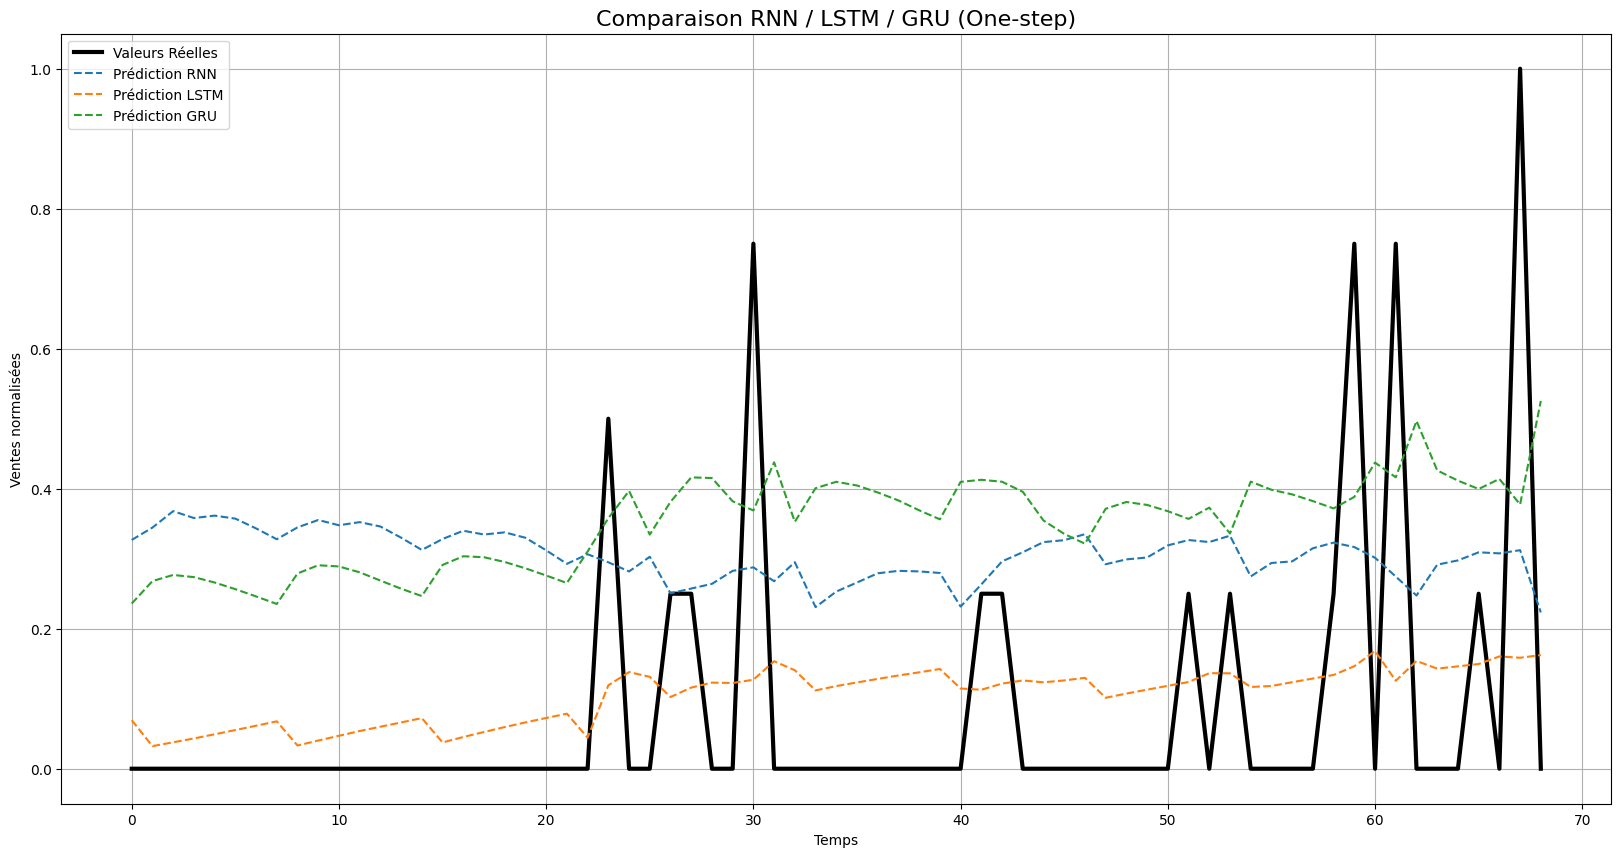

In [7]:
# ===============================
# --- 1️⃣ VERSION ONE-STEP ---
# ===============================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, SimpleRNN, LSTM, GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ---------------------------
# Fixer les seeds (reproductibilité)
# ---------------------------
np.random.seed(42)
tf.random.set_seed(42)

# ---------------------------
# Fonctions de modèles
# ---------------------------
def create_rnn_model(input_shape):
    inputs = Input(shape=input_shape)
    x = SimpleRNN(units=50, activation='tanh')(inputs)
    x = Dropout(0.2)(x)
    outputs = Dense(1)(x)
    return Model(inputs, outputs)

def create_lstm_model(input_shape):
    inputs = Input(shape=input_shape)
    x = LSTM(units=50, activation='tanh')(inputs)
    x = Dropout(0.2)(x)
    outputs = Dense(1)(x)
    return Model(inputs, outputs)

def create_gru_model(input_shape):
    inputs = Input(shape=input_shape)
    x = GRU(units=50, activation='tanh')(inputs)
    x = Dropout(0.2)(x)
    outputs = Dense(1)(x)
    return Model(inputs, outputs)

# ---------------------------
# Fonction de métriques
# ---------------------------
def calculate_metrics(y_true, y_pred):
    y_true_safe = np.where(y_true == 0, 1e-6, y_true)
    metrics = {
        'MAE': mean_absolute_error(y_true, y_pred),
        'MSE': mean_squared_error(y_true, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
        'R^2': r2_score(y_true, y_pred),
        'MAPE (%)': np.mean(np.abs((y_true - y_pred) / y_true_safe)) * 100
    }
    return metrics

# ---------------------------
# Suppose that X and y are already loaded and prepared
# ---------------------------
# Example:
# INPUT_SHAPE = (X.shape[1], X.shape[2])

INPUT_SHAPE = (X.shape[1], X.shape[2])
EPOCHS = 50
BATCH_SIZE = 32

# ---------------------------
# Data Splitting (Adding Validation Set)
# ---------------------------
print("\nPhase: Séparation Train/Validation/Test...")
train_size_pct = 0.7 # 70% for training
val_size_pct = 0.15  # 15% for validation
test_size_pct = 0.15 # 15% for testing (total 100%)

total_samples = X.shape[0]
train_split_idx = int(total_samples * train_size_pct)
val_split_idx = int(total_samples * (train_size_pct + val_size_pct))

X_train = X[:train_split_idx]
y_train = y[:train_split_idx]

X_val = X[train_split_idx:val_split_idx]
y_val = y[train_split_idx:val_split_idx]

X_test = X[val_split_idx:]
y_test = y[val_split_idx:]

print("Split terminé (Train/Validation/Test).")
print(f"Shape X_train: {X_train.shape} | Shape y_train: {y_train.shape}")
print(f"Shape X_val: {X_val.shape}   | Shape y_val: {y_val.shape}")
print(f"Shape X_test: {X_test.shape}   | Shape y_test: {y_test.shape}")


# ---------------------------
# Création et compilation des modèles
# ---------------------------
rnn_model = create_rnn_model(INPUT_SHAPE)
lstm_model = create_lstm_model(INPUT_SHAPE)
gru_model = create_gru_model(INPUT_SHAPE)

models = {'RNN': rnn_model, 'LSTM': lstm_model, 'GRU': gru_model}

for name, model in models.items():
    model.compile(optimizer='adam', loss='mse')

# ---------------------------
# Entraînement
# ---------------------------
callbacks = [EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)]

history, predictions = {}, {}
print("\n--- Début de l'entraînement ---")

for name, model in models.items():
    print(f"\n🔹 Entraînement du modèle : {name}")
    history[name] = model.fit(
        X_train, y_train,
        epochs=EPOCHS,
        batch_size=BATCH_SIZE,
        validation_data=(X_val, y_val),
        shuffle=False,
        callbacks=callbacks,
        verbose=0
    )
    predictions[name] = model.predict(X_test).ravel()

print("\n--- Entraînement terminé ---")

# ---------------------------
# Évaluation
# ---------------------------
metrics = {name: calculate_metrics(y_test, preds) for name, preds in predictions.items()}
metrics_df = pd.DataFrame(metrics).T
print("\n--- Comparaison des Métriques ---")
print(metrics_df.to_markdown(floatfmt=".4f"))

# ---------------------------
# Visualisation
# ---------------------------
plt.figure(figsize=(20, 10))
plt.plot(y_test, label='Valeurs Réelles', color='black', linewidth=3)
for name, preds in predictions.items():
    plt.plot(preds, '--', label=f'Prédiction {name}')
plt.title('Comparaison RNN / LSTM / GRU (One-step)', fontsize=16)
plt.xlabel('Temps')
plt.ylabel('Ventes normalisées')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
# ===================================================
# --- 5. SAUVEGARDE DES MODÈLES (Format H5) ---
# ===================================================
import os

# --- 1. Définir le dossier de sauvegarde ---
try:
    # Si vous êtes sur Google Colab, montez le Drive
    from google.colab import drive
    drive.mount('/content/drive')

    # Le dossier 'models' sera créé à la racine de "Mon Drive"
    SAVE_DIR = '/content/drive/MyDrive/Time_Series_M5/models'
    print(f"Google Drive monté. Sauvegarde dans : {SAVE_DIR}")

except ImportError:
    # Si vous êtes en local, le dossier 'models' sera créé
    # dans le même répertoire que votre script Python.
    SAVE_DIR = 'models'
    print(f"Pas sur Colab. Sauvegarde dans le dossier local : {SAVE_DIR}")


# --- 2. Créer le dossier s'il n'existe pas ---
# exist_ok=True évite une erreur si le dossier existe déjà
os.makedirs(SAVE_DIR, exist_ok=True)


# --- 3. Boucler et sauvegarder chaque modèle ---
print("\n--- Début de la sauvegarde des modèles ---")

for name, model in models.items():
    # Crée un nom de fichier pour chaque modèle (ex: RNN_onestep.h5)
    filename = f"{name}_onestep.h5"
    filepath = os.path.join(SAVE_DIR, filename)

    try:
        # Sauvegarde le modèle au format H5
        model.save(filepath)
        print(f"✅ Modèle '{name}' sauvegardé avec succès : {filepath}")
    except Exception as e:
        print(f"❌ Erreur lors de la sauvegarde du modèle '{name}' : {e}")

print("--- Sauvegarde terminée ---")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Google Drive monté. Sauvegarde dans : /content/drive/MyDrive/Time_Series_M5/models

--- Début de la sauvegarde des modèles ---
✅ Modèle 'RNN' sauvegardé avec succès : /content/drive/MyDrive/Time_Series_M5/models/RNN_onestep.h5
✅ Modèle 'LSTM' sauvegardé avec succès : /content/drive/MyDrive/Time_Series_M5/models/LSTM_onestep.h5
✅ Modèle 'GRU' sauvegardé avec succès : /content/drive/MyDrive/Time_Series_M5/models/GRU_onestep.h5
--- Sauvegarde terminée ---


> 🔎 **Interprétation (One-step) :** Si les erreurs sont faibles, le modèle capture bien la dynamique locale; cependant, il doit être réappliqué récursivement pour prédire plusieurs pas, ce qui peut accumuler l'erreur.

## Multi Step

Chargement du fichier : /content/drive/MyDrive/Time_Series_M5/df_final_reduced.csv
X shape: (400, 14, 11)  |  y shape: (400, 7)
Split sizes -> train: 280 val: 60 test: 60
INPUT_SHAPE: (14, 11) HORIZON: 7


/tmp/ipython-input-2503555984.py:91: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.25925926 0.25925926 0.16666667 0.25925926 0.12962963 0.5
 0.12962963 0.33333333 1.         0.16666667 0.18518519 0.18518519
 0.25925926 0.27777778 0.18518519 0.38888889 0.38888889 0.16666667
 0.         0.09259259 0.16666667 0.         0.05555556 0.09259259
 0.09259259 0.09259259 0.16666667 0.03703704 0.22222222 0.11111111
 0.         0.01851852 0.         0.27777778 0.35185185 0.2962963
 0.31481481 0.48148148 0.22222222 0.2037037  0.22222222 0.35185185
 0.38888889 0.38888889 0.27777778 0.03703704 0.         0.
 0.14814815 0.         0.         0.16666667 0.12962963 0.11111111
 0.12962963 0.14814815 0.14814815 0.2037037  0.09259259 0.05555556]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[mask, ['sales']] = scaler.fit_transform(sales_vals)



--- Entraînement multi-step (HORIZON=7 jours) ---
Training RNN ...
Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 290ms/step - loss: 0.8790 - val_loss: 2.6379
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.4107 - val_loss: 1.4374
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2607 - val_loss: 0.7816
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2297 - val_loss: 0.5251
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2002 - val_loss: 0.4612
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1662 - val_loss: 0.4335
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1479 - val_loss: 0.4088
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1370 - val_loss: 0.3974
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1211 - val_loss: 0.3786
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1110 - val_loss: 0.3728
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1059 - val_loss: 0.3870
Epoch 12/50
9/9 

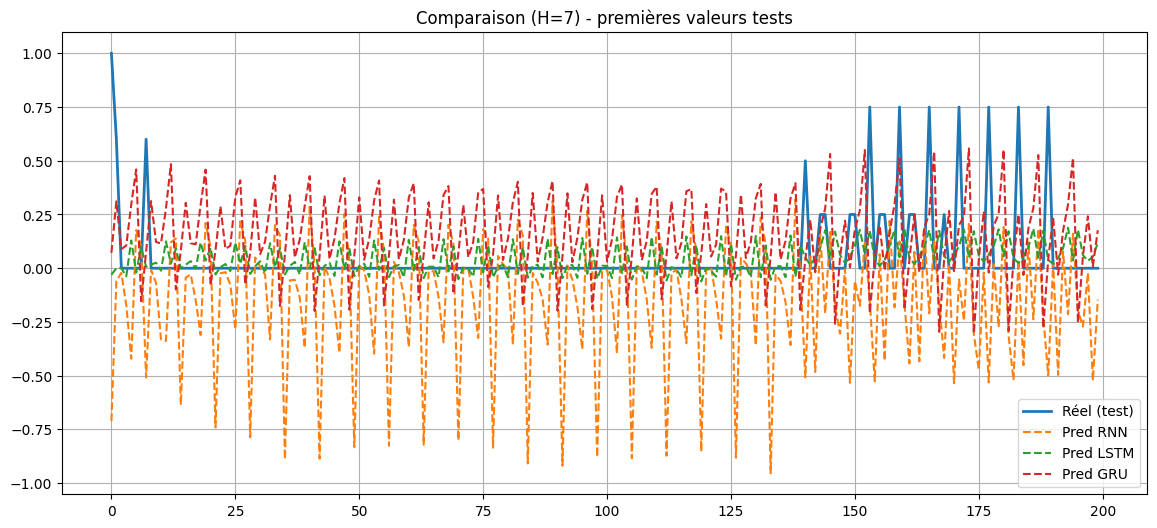


Script terminé — modèles entraînés et évalués.


In [10]:
# ============================================
# Script complet : préparation + entraînement
# Multi-step (compatible HORIZON = 1 ou >1)
# ============================================

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, GRU, SimpleRNN, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# ---------------------------
# Réglages reproductibilité & logs
# ---------------------------
np.random.seed(42)
tf.random.set_seed(42)
tf.get_logger().setLevel('ERROR')

# ---------------------------
# Paramètres utilisateur
# ---------------------------
BASE_PATH = "/content/drive/MyDrive/Time_Series_M5"   # adapte si besoin
FILE_NAME = "df_final_reduced.csv"
FILE_PATH = os.path.join(BASE_PATH, FILE_NAME)

# Fenêtres
N_PAST = 14       # jours utilisés comme entrée
N_FUTURE = 7      # jours à prédire (mettre 1 pour one-step)
TEST_PCT = 0.15   # portion finale pour test
VAL_PCT = 0.15    # portion pour validation (après train)
# Training
EPOCHS = 50
BATCH_SIZE = 32
PATIENCE = 6

# ---------------------------
# Chargement et nettoyage
# ---------------------------
print("Chargement du fichier :", FILE_PATH)
if not os.path.exists(FILE_PATH):
    raise FileNotFoundError(f"Fichier introuvable : {FILE_PATH}")

df_final = pd.read_csv(FILE_PATH)
df_final['date'] = pd.to_datetime(df_final['date'])
df_final = df_final.sort_values(by=['id', 'date']).reset_index(drop=True)

# Remplir sell_price par ffill/bfill par id, puis 0 si toujours NaN
df_final['sell_price'] = df_final.groupby('id')['sell_price'].ffill()
df_final['sell_price'] = df_final.groupby('id')['sell_price'].bfill()
df_final['sell_price'] = df_final['sell_price'].fillna(0)

# ---------------------------
# Feature engineering
# ---------------------------
df = df_final.copy()
df['day_of_week'] = df['date'].dt.dayofweek
df['day_of_month'] = df['date'].dt.day
df['month'] = df['date'].dt.month

# Encoder catégorielles (gardons les encodeurs)
cat_cols = ['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id']
encoders = {}
for c in cat_cols:
    le = LabelEncoder()
    df[c] = le.fit_transform(df[c].astype(str))
    encoders[c] = le

# ---------------------------
# Scaling
# - global scaler pour sell_price & date-features
# - scaler par id pour sales (pour préserver amplitude par article)
# ---------------------------
global_cols = ['sell_price', 'day_of_week', 'day_of_month', 'month']
global_scaler = MinMaxScaler()
df[global_cols] = global_scaler.fit_transform(df[global_cols])

# scale sales per item id (id column already encoded 0..9)
sales_scalers = {}
for item_int in np.sort(df['id'].unique()):
    mask = df['id'] == item_int
    scaler = MinMaxScaler()
    # reshape to 2D
    sales_vals = df.loc[mask, ['sales']].values
    if len(sales_vals) == 0:
        continue
    df.loc[mask, ['sales']] = scaler.fit_transform(sales_vals)
    sales_scalers[item_int] = scaler

# ---------------------------
# Construction des séquences (windowing)
# ---------------------------
feature_cat = ['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id']
feature_num = ['sales', 'sell_price', 'day_of_week', 'day_of_month', 'month']
feature_cols = feature_cat + feature_num
target_col = 'sales'

X_list = []
y_list = []

# on assume que chaque id a au moins N_PAST + N_FUTURE observations
for item_int in np.sort(df['id'].unique()):
    df_item = df[df['id'] == item_int].sort_values('date')
    n_rows = df_item.shape[0]
    # si pas assez de jours on skip
    if n_rows < N_PAST + N_FUTURE:
        continue
    values = df_item[feature_cols].values
    sales_vals = df_item[target_col].values
    for i in range(N_PAST, n_rows - N_FUTURE + 1):
        X_seq = values[i - N_PAST : i, :]               # (N_PAST, n_features)
        y_seq = sales_vals[i : i + N_FUTURE]            # (N_FUTURE,)
        X_list.append(X_seq)
        y_list.append(y_seq)

X = np.array(X_list)   # shape (samples, N_PAST, n_features)
y = np.array(y_list)   # shape (samples, N_FUTURE)

# S'assurer forme (N, HORIZON) même si HORIZON=1
if y.ndim == 1:
    y = y.reshape(-1, 1)

print(f"X shape: {X.shape}  |  y shape: {y.shape}")
n_samples = X.shape[0]

# ---------------------------
# Split chronologique : train / val / test
# (on prend la dernière portion comme test, puis val juste avant)
# ---------------------------
test_size = int(np.ceil(n_samples * TEST_PCT))
val_size = int(np.ceil(n_samples * VAL_PCT))
train_size = n_samples - val_size - test_size

if train_size <= 0:
    raise ValueError("Trop peu d'échantillons pour ces proportions. Reduire TEST_PCT/VAL_PCT ou augmenter données.")

X_train = X[:train_size]
y_train = y[:train_size]
X_val = X[train_size:train_size + val_size]
y_val = y[train_size:train_size + val_size]
X_test = X[train_size + val_size:]
y_test = y[train_size + val_size:]

print("Split sizes -> train:", X_train.shape[0], "val:", X_val.shape[0], "test:", X_test.shape[0])

# ---------------------------
# Définir l'horizon et la shape d'entrée
# ---------------------------
HORIZON = y_train.shape[1]   # maintenant sûr d'exister
INPUT_SHAPE = (X_train.shape[1], X_train.shape[2])
print("INPUT_SHAPE:", INPUT_SHAPE, "HORIZON:", HORIZON)

# ---------------------------
# Modèles (multi-step ready)
# ---------------------------
def create_rnn_multi(input_shape, horizon):
    inp = Input(shape=input_shape)
    x = SimpleRNN(50, activation='tanh')(inp)
    x = Dropout(0.2)(x)
    out = Dense(horizon)(x)
    return Model(inp, out)

def create_lstm_multi(input_shape, horizon):
    inp = Input(shape=input_shape)
    x = LSTM(50, activation='tanh')(inp)
    x = Dropout(0.2)(x)
    out = Dense(horizon)(x)
    return Model(inp, out)

def create_gru_multi(input_shape, horizon):
    inp = Input(shape=input_shape)
    x = GRU(50, activation='tanh')(inp)
    x = Dropout(0.2)(x)
    out = Dense(horizon)(x)
    return Model(inp, out)

rnn_model = create_rnn_multi(INPUT_SHAPE, HORIZON)
lstm_model = create_lstm_multi(INPUT_SHAPE, HORIZON)
gru_model = create_gru_multi(INPUT_SHAPE, HORIZON)

for m in (rnn_model, lstm_model, gru_model):
    m.compile(optimizer='adam', loss='mse')

models = {'RNN': rnn_model, 'LSTM': lstm_model, 'GRU': gru_model}

# ---------------------------
# Métriques pour multi-step
# ---------------------------
def calculate_metrics_multi(y_true, y_pred):
    # y_true, y_pred shape (N, H)
    y_true_flat = y_true.reshape(-1)
    y_pred_flat = y_pred.reshape(-1)
    y_true_safe = np.where(y_true_flat == 0, 1e-6, y_true_flat)
    return {
        'MAE': mean_absolute_error(y_true_flat, y_pred_flat),
        'MSE': mean_squared_error(y_true_flat, y_pred_flat),
        'RMSE': np.sqrt(mean_squared_error(y_true_flat, y_pred_flat)),
        'R^2': r2_score(y_true_flat, y_pred_flat),
        'MAPE (%)': np.mean(np.abs((y_true_flat - y_pred_flat) / y_true_safe)) * 100
    }

# ---------------------------
# Entraînement
# ---------------------------
callbacks = [EarlyStopping(monitor='val_loss', patience=PATIENCE, restore_best_weights=True)]
history = {}
predictions = {}

print("\n--- Entraînement multi-step (HORIZON={} jours) ---".format(HORIZON))
for name, model in models.items():
    print(f"Training {name} ...")
    history[name] = model.fit(
        X_train, y_train,
        epochs=EPOCHS,
        batch_size=BATCH_SIZE,
        validation_data=(X_val, y_val),
        shuffle=False,
        callbacks=callbacks,
        verbose=1
    )
    preds = model.predict(X_test)
    predictions[name] = preds
    print(f"{name} done. preds shape: {preds.shape}")

# ---------------------------
# Évaluation
# ---------------------------
metrics = {name: calculate_metrics_multi(y_test, preds) for name, preds in predictions.items()}
metrics_df = pd.DataFrame(metrics).T
print("\n--- Comparaison des Métriques (sur test) ---")
print(metrics_df.to_markdown(floatfmt=".4f"))

# ---------------------------
# Visualisation (on trace les premiers exemples)
# ---------------------------
# On trace la première séquence test : vrai vs prédit (tous les horizons concaténés)
plt.figure(figsize=(14,6))
plt.plot(y_test.reshape(-1)[:200], label='Réel (test)', linewidth=2)
for name, preds in predictions.items():
    plt.plot(preds.reshape(-1)[:200], '--', label=f'Pred {name}')
plt.title(f'Comparaison (H={HORIZON}) - premières valeurs tests')
plt.legend()
plt.grid()
plt.show()

print("\nScript terminé — modèles entraînés et évalués.")


> 🔎 **Interprétation (Multi-step) :** Prévoir plusieurs pas à la fois réduit l'accumulation d'erreurs de récursivité, mais peut être plus difficile à entraîner et produire des prédictions moins précises pour chaque pas individuel.

In [11]:
# ===============================================
# --- AJOUT POUR LA SAUVEGARDE DES MODÈLES ---
# ===============================================

# Le chemin exact que vous avez demandé
SAVE_DIR = "/content/drive/MyDrive/Time_Series_M5/models"

print(f"\n--- Début de la sauvegarde des modèles dans : {SAVE_DIR} ---")

# 1. Créer le dossier de destination s'il n'existe pas
#    (os a déjà été importé en haut du script)
os.makedirs(SAVE_DIR, exist_ok=True)

# 2. Boucler sur les modèles entraînés et les sauvegarder
for name, model in models.items():

    # Crée un nom de fichier unique (ex: RNN_multistep_H7.h5)
    filename = f"{name}_multistep_H{HORIZON}.h5"
    filepath = os.path.join(SAVE_DIR, filename)

    try:
        # Sauvegarde le modèle au format H5
        model.save(filepath)
        print(f"✅ Modèle '{name}' sauvegardé avec succès : {filepath}")
    except Exception as e:
        print(f"❌ Erreur lors de la sauvegarde du modèle '{name}' : {e}")

print("--- Sauvegarde terminée ---")




--- Début de la sauvegarde des modèles dans : /content/drive/MyDrive/Time_Series_M5/models ---
✅ Modèle 'RNN' sauvegardé avec succès : /content/drive/MyDrive/Time_Series_M5/models/RNN_multistep_H7.h5
✅ Modèle 'LSTM' sauvegardé avec succès : /content/drive/MyDrive/Time_Series_M5/models/LSTM_multistep_H7.h5
✅ Modèle 'GRU' sauvegardé avec succès : /content/drive/MyDrive/Time_Series_M5/models/GRU_multistep_H7.h5
--- Sauvegarde terminée ---
